## Creación de clasificador de reseñas de la tienda de Google Play.

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/naive-bayes-project-tutorial/main/playstore_reviews.csv")
df.head()


,package_name,review,polarity
0,com.facebook.katana,privacy at least put some option appear offli...,0
1,com.facebook.katana,"messenger issues ever since the last update, ...",0
2,com.facebook.katana,profile any time my wife or anybody has more ...,0
3,com.facebook.katana,the new features suck for those of us who don...,0
4,com.facebook.katana,forced reload on uploading pic on replying co...,0


In [28]:
#Eliminamos la columna package_name
df.drop("package_name", axis=1, inplace=True)
print(df)

                                                review  polarity
0     privacy at least put some option appear offli...         0
1     messenger issues ever since the last update, ...         0
2     profile any time my wife or anybody has more ...         0
3     the new features suck for those of us who don...         0
4     forced reload on uploading pic on replying co...         0
..                                                 ...       ...
886   loved it i loooooooooooooovvved it because it...         1
887   all time legendary game the birthday party le...         1
888   ads are way to heavy listen to the bad review...         0
889   fun works perfectly well. ads aren't as annoy...         1
890   they're everywhere i see angry birds everywhe...         1

[891 rows x 2 columns]


In [29]:
#Convertimos los comentarios a texto plano, eliminamos espacios y convertimos a minusculas

import re

df["column"] = df["review"].str.strip().str.lower()  # Elimina espacios y convierte a minúsculas
df["column"] = df["column"].apply(lambda x: re.sub(r"[^a-z\s]", "", x))  # Elimina caracteres especiales
df["column"] = df["column"].str.replace(r"\s+", " ", regex=True)  # Reemplaza múltiples espacios por uno solo

print(df["column"])


0      privacy at least put some option appear offlin...
1      messenger issues ever since the last update in...
2      profile any time my wife or anybody has more t...
3      the new features suck for those of us who dont...
4      forced reload on uploading pic on replying com...
                             ...                        
886    loved it i loooooooooooooovvved it because it ...
887    all time legendary game the birthday party lev...
888    ads are way to heavy listen to the bad reviews...
889    fun works perfectly well ads arent as annoying...
890    theyre everywhere i see angry birds everywhere...
Name: column, Length: 891, dtype: object


In [30]:
import regex as re

def preprocess_text(text):
    # Eliminar cualquier caracter que no sea una letra (a-z) o un espacio en blanco ( )
    text = re.sub(r'[^a-z ]', " ", text)

    # Eliminar espacios en blanco
    text = re.sub(r'\s+[a-zA-Z]\s+', " ", text)
    text = re.sub(r'\^[a-zA-Z]\s+', " ", text)

    # Reducir espacios en blanco múltiples a uno único
    text = re.sub(r'\s+', " ", text.lower())

    # Eliminar tags
    text = re.sub("&lt;/?.*?&gt;"," &lt;&gt; ", text)

    return text.split()

df["review"] = df["review"].apply(preprocess_text)
df.head()

,review,polarity,column
0,"[privacy, at, least, put, some, option, appear...",0,privacy at least put some option appear offlin...
1,"[messenger, issues, ever, since, the, last, up...",0,messenger issues ever since the last update in...
2,"[profile, any, time, my, wife, or, anybody, ha...",0,profile any time my wife or anybody has more t...
3,"[the, new, features, suck, for, those, of, us,...",0,the new features suck for those of us who dont...
4,"[forced, reload, on, uploading, pic, on, reply...",0,forced reload on uploading pic on replying com...


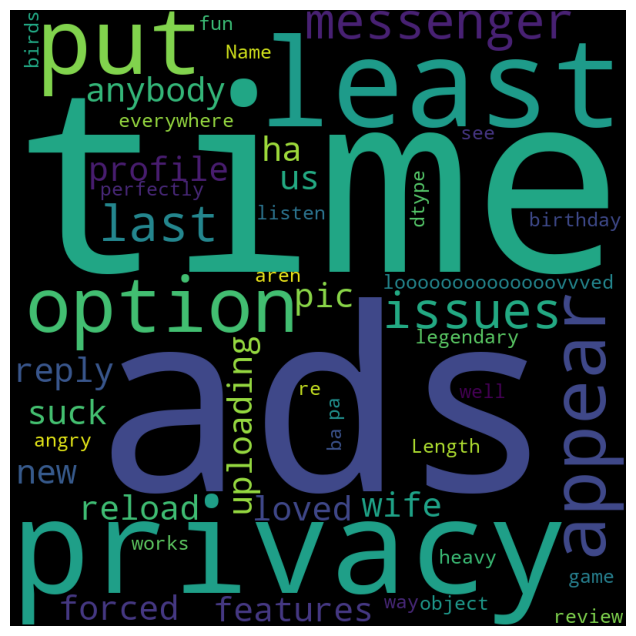

In [20]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(width = 800, height = 800, background_color = "black", max_words = 1000, min_font_size = 20, random_state = 42)\
    .generate(str(df["review"]))

fig = plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# Transformación de texto en una matriz de recuento de palabras. 

In [32]:
from sklearn.model_selection import train_test_split

X = df["review"]
y = df["polarity"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()

331    [just, did, the, latest, update, on, viber, an...
733    [keeps, crashing, it, only, works, well, in, e...
382    [the, fail, boat, has, arrived, the, version, ...
704    [superfast, just, as, remember, it, opera, min...
813    [installed, and, immediately, deleted, this, c...
Name: review, dtype: object

In [33]:
from sklearn.feature_extraction.text import CountVectorizer

# Inicializar el transformador
vec_model = CountVectorizer(stop_words="english")

# Asegurar que los datos sean listas o series de texto
X_train = X_train.astype(str) if hasattr(X_train, "astype") else list(map(str, X_train))
X_test = X_test.astype(str) if hasattr(X_test, "astype") else list(map(str, X_test))

# Ajustar el vectorizador al conjunto de entrenamiento y transformarlo en matriz de cuenta de palabras
X_train = vec_model.fit_transform(X_train).toarray()
X_test = vec_model.transform(X_test).toarray()


In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer

tokens_list = df["review"]
tokens_list = [" ".join(tokens) for tokens in tokens_list]

In [35]:
vectorizer = TfidfVectorizer(max_features = 5000, max_df = 0.8, min_df = 5)
X = vectorizer.fit_transform(tokens_list).toarray()
y = df["polarity"]

In [36]:
X[:1]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.04424868, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.14968573, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.0873627 , 0.        , 0.        , 0.09046405, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.15082355, 0.        , 0.  

# Implementando los modelos Naive Bayes

### Modelo GaussianNB

In [37]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [38]:
y_pred = model.predict(X_test)
y_pred

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0])

In [39]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.7988826815642458

### Modelo BernoulliNB

In [40]:
from sklearn.naive_bayes import BernoulliNB
model_Bernoulli = BernoulliNB()
model_Bernoulli.fit(X_train, y_train)

BernoulliNB()

In [41]:
y_pred_B =model_Bernoulli.predict(X_test)
y_pred_B

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0])

In [42]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred_B)

0.776536312849162

### Modelo MultinomialNB

In [47]:
from sklearn.naive_bayes import MultinomialNB

model_m = MultinomialNB()
model_m.fit(X_train, y_train)

MultinomialNB()

In [49]:
y_pred_m = model_m.predict(X_test)
y_pred_m

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0])

In [50]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred_m)

0.8044692737430168

# Optimización de parametros de modelo MultinomialNB

In [51]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV

hyperparams = {
    "alpha": np.linspace(0.01, 10.0, 200),
    "fit_prior": [True, False]
}

# We initialize the random search
random_search = RandomizedSearchCV(model_m, hyperparams, n_iter = 50, scoring = "accuracy", cv = 5, random_state = 42)
random_search

RandomizedSearchCV(cv=5, estimator=MultinomialNB(), n_iter=50,
                   param_distributions={'alpha': array([ 0.01      ,  0.06020101,  0.11040201,  0.16060302,  0.21080402,
        0.26100503,  0.31120603,  0.36140704,  0.41160804,  0.46180905,
        0.51201005,  0.56221106,  0.61241206,  0.66261307,  0.71281407,
        0.76301508,  0.81321608,  0.86341709,  0.91361809,  0.9638191 ,
        1.0140201 ,  1.06422111,  1.11442211,  1.1646231...
        8.54417085,  8.59437186,  8.64457286,  8.69477387,  8.74497487,
        8.79517588,  8.84537688,  8.89557789,  8.94577889,  8.9959799 ,
        9.0461809 ,  9.09638191,  9.14658291,  9.19678392,  9.24698492,
        9.29718593,  9.34738693,  9.39758794,  9.44778894,  9.49798995,
        9.54819095,  9.59839196,  9.64859296,  9.69879397,  9.74899497,
        9.79919598,  9.84939698,  9.89959799,  9.94979899, 10.        ]),
                                        'fit_prior': [True, False]},
                   random_state=42, scoring='accuracy')

In [52]:
random_search.fit(X_train, y_train)

print(f"Best hyperparameters: {random_search.best_params_}")

Best hyperparameters: {'fit_prior': False, 'alpha': np.float64(1.4156281407035176)}


In [54]:
model_best = MultinomialNB(fit_prior= False, alpha=np.float64(1.4156281407035176))
model_best.fit(X_train, y_train)
model.fit(X_train, y_train)
y_pred_best = model_best.predict(X_test)
accuracy_score(y_test, y_pred_best)

0.8212290502793296

# Guardando el mejor modelo

In [57]:
from pickle import dump

dump(model_best, open("../models/model_best_default_42.sav", "wb"))
